## Finetuning a network

Tasks

(Note: In this task, if you are adapting the code based on the open-source projects, pls acknowledge the original source in your code files, and also clearly mention it in your report. Also you need to clearly highlight which parts are done by yourself)

In [1]:
import argparse
from utils_ic import load_data, read_jason
from model_ic import NN_Classifier, validation, make_NN, save_checkpoint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from torch import optim
'done'

'done'

In [27]:
# settable vars
data_dir = 'flowers'
archs = ['alexnet', 'densenet169'] # vgg11 alexnet densenet169
overwriteLossValues = False

In [3]:
# misc functions
def train(
    data_dir,
    cat_names='cat_to_name.json',
    arch='densenet169',
    lr=0.001,
    hidden_units=1024,
    eps=1,
    device='cuda',
    save_dir=None,
    freeze_feature_layers=False,
    optim=None
    ):

    cat_to_name = read_jason(cat_names)

    trainloader, testloader, validloader, train_data = load_data(data_dir)

    val_loss, model = make_NN(
        n_hidden=[hidden_units],
        n_epoch=eps,
        labelsdict=cat_to_name,
        lr=lr,
        device=device,
        model_name=arch,
        trainloader=trainloader,
        validloader=validloader,
        train_data=train_data,
        freeze_feature_layers=freeze_feature_layers,
        optimizer_name=optim
    )

    if save_dir:
        save_checkpoint(model, save_dir + '.pt')
        
    return val_loss

def saveLossValues(archs, results, path):
    data = {arch: loss for arch, loss in zip(archs, results)}
    lossdf = pd.DataFrame.from_dict(data)
    lossdf.to_csv(path)
    return lossdf


(1) Replace the used base model (densenet169) to another model (refer to https://pytorch.org/vision/0.8/models.html for more types of models). Pls compare the performance of these two models on the validation set.

In [4]:
# init results arr to store results
results = []
for i, arch in enumerate(archs):
    print('training arch {}: {}'.format(i, arch))
    save_dir = 'models/' + arch
    
    # run training and save results
    results.append(train(data_dir, arch=arch, save_dir=save_dir))
    print('\n---------------------------\n')
print('all done')
if overwriteLossValues:
    path = 'results/homework3p2q1.csv'
    saveLossValues(archs, results, path)

training arch 0: alexnet
Epoch: 1/1 -  Training Loss: 3.999 -  Validation Loss: 2.755 -  Validation Accuracy: 0.365
Epoch: 1/1 -  Training Loss: 2.571 -  Validation Loss: 1.882 -  Validation Accuracy: 0.524
Epoch: 1/1 -  Training Loss: 2.280 -  Validation Loss: 1.449 -  Validation Accuracy: 0.635
Epoch: 1/1 -  Training Loss: 1.976 -  Validation Loss: 1.229 -  Validation Accuracy: 0.655
Epoch: 1/1 -  Training Loss: 1.740 -  Validation Loss: 1.087 -  Validation Accuracy: 0.704
Epoch: 1/1 -  Training Loss: 1.676 -  Validation Loss: 1.021 -  Validation Accuracy: 0.701
Epoch: 1/1 -  Training Loss: 1.602 -  Validation Loss: 1.132 -  Validation Accuracy: 0.689
Epoch: 1/1 -  Training Loss: 1.626 -  Validation Loss: 0.978 -  Validation Accuracy: 0.721
Epoch: 1/1 -  Training Loss: 1.438 -  Validation Loss: 0.951 -  Validation Accuracy: 0.734
Epoch: 1/1 -  Training Loss: 1.538 -  Validation Loss: 0.920 -  Validation Accuracy: 0.741
model: alexnet - hidden layers: [1024] - epochs: 1 - lr: 0.001
Ru

(2) Please try different training methods that use densenet169 as the base model (i.e., training the whole model from scratch, finetuning the model but only updating the top layers, finetuning the whole model), and compare their performance on the validation set. Please also draw the curves of training/validation losses over training steps for these methods, and give your analysis based on the observed curves.

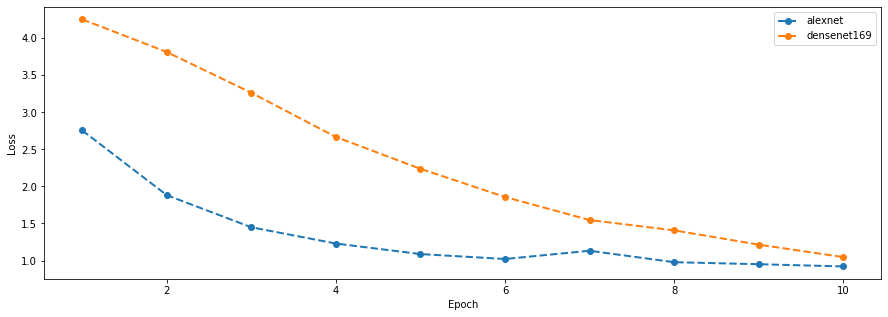

In [15]:
# get the saved loss values
lossdf = pd.read_csv('results/homework3p2q1.csv')
loss_values = lossdf[archs].T.values

# set the plot attributes before plotting the loss values
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
fig.set_figheight(5)
fig.set_figwidth(15)
plt.legend(archs) 

# plot the loss values
t = np.arange(1, loss_values.shape[1] + 1, 1)
for result in loss_values:
    plt.plot(t, result, '--o',label='line 1', linewidth=2)
    
plt.legend(archs) 
plt.show() 

(3) For the model based on densenet169, please also report its performance (when you use the training method of finetuning the model but only updating the top layers) on the testing set.

In [25]:
arch = 'densenet169' 
print('training arch: {}'.format(arch))
save_dir = 'models/' + arch + '_frozen_hidden_layers'
loss_values = train(data_dir, arch=arch, save_dir=save_dir, freeze_feature_layers=True)
if overwriteLossValues:
    path = 'results/homework3p2q3.csv'
    saveLossValues([arch  + '_frozen_feature_layers'], [loss_values], path)

training arch: densenet169
Epoch: 1/1 -  Training Loss: 4.649 -  Validation Loss: 4.294 -  Validation Accuracy: 0.088
Epoch: 1/1 -  Training Loss: 4.299 -  Validation Loss: 3.968 -  Validation Accuracy: 0.214
Epoch: 1/1 -  Training Loss: 3.914 -  Validation Loss: 3.389 -  Validation Accuracy: 0.340
Epoch: 1/1 -  Training Loss: 3.415 -  Validation Loss: 2.849 -  Validation Accuracy: 0.428
Epoch: 1/1 -  Training Loss: 3.060 -  Validation Loss: 2.398 -  Validation Accuracy: 0.493
Epoch: 1/1 -  Training Loss: 2.755 -  Validation Loss: 2.029 -  Validation Accuracy: 0.544
Epoch: 1/1 -  Training Loss: 2.401 -  Validation Loss: 1.679 -  Validation Accuracy: 0.640
Epoch: 1/1 -  Training Loss: 2.102 -  Validation Loss: 1.482 -  Validation Accuracy: 0.672
Epoch: 1/1 -  Training Loss: 2.036 -  Validation Loss: 1.331 -  Validation Accuracy: 0.735
Epoch: 1/1 -  Training Loss: 1.856 -  Validation Loss: 1.179 -  Validation Accuracy: 0.754
model: densenet169 - hidden layers: [1024] - epochs: 1 - lr: 0.

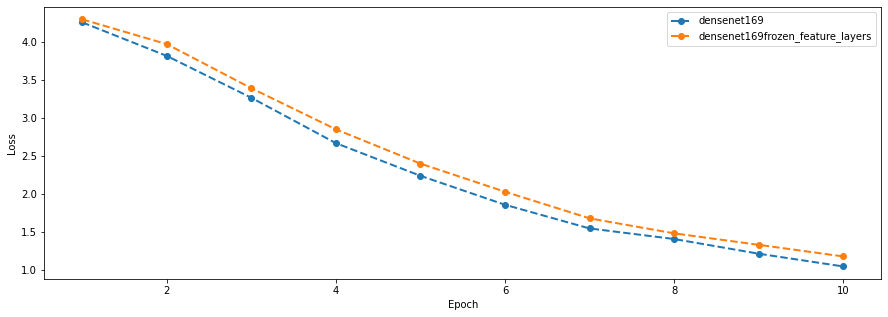

In [26]:
arch = 'densenet169' 

# get densenet169 results
lossdf = pd.read_csv('results/homework3p2q1.csv')
loss_values = lossdf[arch].values
loss_values = np.expand_dims(loss_values, axis=1) # add dimension to concat 

# get dense169 with frozen feature extraction layers
lossdf2 = pd.read_csv('results/homework3p2q3.csv')
loss_values2 = lossdf2[arch + '_frozen_feature_layers'].values
loss_values2 = np.expand_dims(loss_values2, axis=1) # add dimension to concat 

# concat both results
loss_values = np.concatenate((loss_values,loss_values2), axis=1).T

# set the plot attributes before plotting the loss values
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
fig.set_figheight(5)
fig.set_figwidth(15)
labels = [arch, arch + 'frozen_feature_layers']
plt.legend(labels) 

# plot the loss values
t = np.arange(1, loss_values.shape[1] + 1, 1)
for result in loss_values:
    plt.plot(t, result, '--o',label='line 1', linewidth=2)

plt.legend(labels) 
plt.show() 

(4) Please replace the base model to a new model which contains some convolutional layers. You need to write this new model by yourselves, and then report its performance on the validation set. Note, pls try different numbers of convolutional layers for your model, and compare their results, and give analysis for the results. You need to try at least 2 different numbers of conv layers.

Extra tasks (not included in Homework 3):

(5) Please try using two different learning rate scheduling schemes for densenet169, and compare the performance on the validation set.

In [13]:
# specify model
arch = 'densenet169'

# set learning rates
learning_rates  = [0.1, 0.0001]

# init arr to store results
results = []
for i, lr in enumerate(learning_rates):
    print('training lr {}: {}'.format(i, lr))
    save_dir = 'models/' + arch + '_lr{}'.format(lr)
    
    # run training to save results
    results.append(train(data_dir, arch=arch, save_dir=save_dir, lr=lr))
    print('\n---------------------------\n')
if overwriteLossValues:
    path = 'results/homework3p2q5.csv'
    saveLossValues([arch  + '_lr{}'.format(lr) for lr in learning_rates], results, path)

training lr 0: 0.1
Epoch: 1/1 -  Training Loss: 227.316 -  Validation Loss: 4.611 -  Validation Accuracy: 0.040
Epoch: 1/1 -  Training Loss: 4.695 -  Validation Loss: 4.524 -  Validation Accuracy: 0.044
Epoch: 1/1 -  Training Loss: 5.312 -  Validation Loss: 4.475 -  Validation Accuracy: 0.047
Epoch: 1/1 -  Training Loss: 4.619 -  Validation Loss: 4.483 -  Validation Accuracy: 0.034
Epoch: 1/1 -  Training Loss: 4.558 -  Validation Loss: 4.483 -  Validation Accuracy: 0.046
Epoch: 1/1 -  Training Loss: 4.580 -  Validation Loss: 4.476 -  Validation Accuracy: 0.046
Epoch: 1/1 -  Training Loss: 4.897 -  Validation Loss: 4.465 -  Validation Accuracy: 0.046
Epoch: 1/1 -  Training Loss: 4.587 -  Validation Loss: 4.482 -  Validation Accuracy: 0.039
Epoch: 1/1 -  Training Loss: 4.579 -  Validation Loss: 4.476 -  Validation Accuracy: 0.046
Epoch: 1/1 -  Training Loss: 4.669 -  Validation Loss: 4.489 -  Validation Accuracy: 0.035
model: densenet169 - hidden layers: [1024] - epochs: 1 - lr: 0.1
Run 

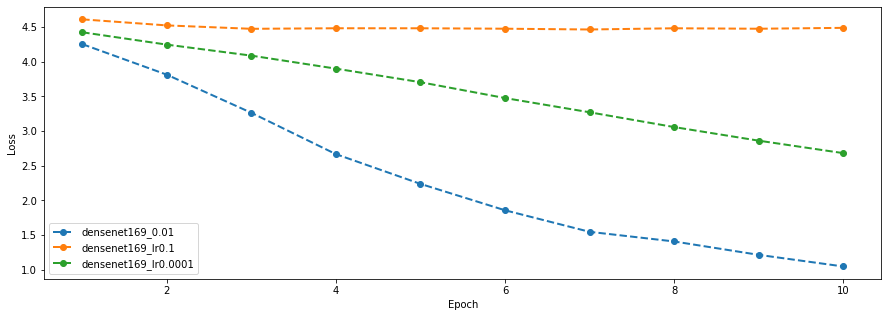

In [18]:
arch = 'densenet169'

# get densenet169 results
lossdf = pd.read_csv('results/homework3p2q1.csv')
loss_values = lossdf[arch].values
loss_values = np.expand_dims(loss_values, axis=1) # add dimension to concat 

# get dense169 with different learning rates layers
lossdf2 = pd.read_csv('results/homework3p2q5.csv')
cols = [arch + '_lr{}'.format(lr) for lr in learning_rates]
loss_values2 = lossdf2[cols].values

# concat both results
loss_values = np.concatenate((loss_values,loss_values2), axis=1).T

# set the plot attributes before plotting the loss values
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
fig.set_figheight(5)
fig.set_figwidth(15)
labels = [arch + '_0.01'] + cols

# plot the loss values
t = np.arange(1, loss_values.shape[1] + 1, 1)
for result in loss_values:
    plt.plot(t, result, '--o',label='line 1', linewidth=2)
plt.legend(labels) 
plt.show() 

(6) Please try using two different optimizers for densenet169, and compare the performance on the validation set.

In [19]:
optimizers = ['AdamW', 'SGD']
arch = 'densenet169'
for i, optim in enumerate(optimizers):
    print('training optim {}: {}'.format(i, optim))
    save_dir = 'models/' + arch + '_optim{}'.format(optim)
    results.append(train(data_dir, arch=arch, save_dir=save_dir, optim=optim))
    print('\n---------------------------\n')
if overwriteLossValues:
    path = 'results/homework3p2q6.csv'
    saveLossValues([arch  + '_optim{}'.format(optim) for optim in optimizers], results, path)

training optim 0: AdamW
Epoch: 1/1 -  Training Loss: 4.602 -  Validation Loss: 4.278 -  Validation Accuracy: 0.166
Epoch: 1/1 -  Training Loss: 4.279 -  Validation Loss: 3.922 -  Validation Accuracy: 0.251
Epoch: 1/1 -  Training Loss: 3.788 -  Validation Loss: 3.411 -  Validation Accuracy: 0.289
Epoch: 1/1 -  Training Loss: 3.399 -  Validation Loss: 2.769 -  Validation Accuracy: 0.429
Epoch: 1/1 -  Training Loss: 2.966 -  Validation Loss: 2.239 -  Validation Accuracy: 0.546
Epoch: 1/1 -  Training Loss: 2.666 -  Validation Loss: 1.955 -  Validation Accuracy: 0.571
Epoch: 1/1 -  Training Loss: 2.346 -  Validation Loss: 1.623 -  Validation Accuracy: 0.637
Epoch: 1/1 -  Training Loss: 2.017 -  Validation Loss: 1.347 -  Validation Accuracy: 0.732
Epoch: 1/1 -  Training Loss: 1.857 -  Validation Loss: 1.236 -  Validation Accuracy: 0.734
Epoch: 1/1 -  Training Loss: 1.821 -  Validation Loss: 1.137 -  Validation Accuracy: 0.755
model: densenet169 - hidden layers: [1024] - epochs: 1 - lr: 0.001

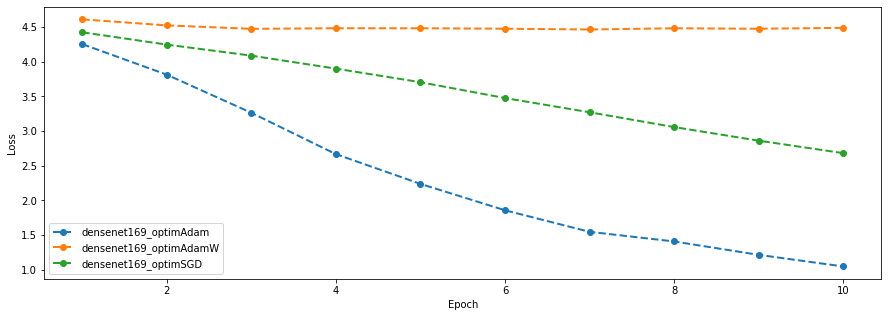

In [22]:
arch = 'densenet169' 

# get densenet169 results
lossdf = pd.read_csv('results/homework3p2q1.csv')
loss_values = lossdf[arch].values
loss_values = np.expand_dims(loss_values, axis=1) # add dimension to concat 

# get dense169 with different optimizers
lossdf2 = pd.read_csv('results/homework3p2q6.csv')
cols = [arch + '_optim{}'.format(optim) for optim in optimizers]
loss_values2 = lossdf2[cols].values

# concat both results
loss_values = np.concatenate((loss_values,loss_values2), axis=1).T

# set the plot attributes before plotting the loss values
fig = plt.figure()
ax1 = fig.add_subplot()
ax1.set_ylabel('Loss')
ax1.set_xlabel('Epoch')
fig.set_figheight(5)
fig.set_figwidth(15)
labels = [arch + '_optimAdam'] + cols

# plot the loss values
t = np.arange(1, loss_values.shape[1] + 1, 1)
for result in loss_values:
    plt.plot(t, result, '--o',label='line 1', linewidth=2)
plt.legend(labels) 
plt.show() 

In [24]:
# get dense169 with different optimizers
lossdf2 = pd.read_csv('results/homework3p2q6.csv')
cols = [arch + '_optim{}'.format(optim) for optim in optimizers]
loss_values2 = lossdf2[cols].values
loss_values2

array([[4.6112277 , 4.42504381],
       [4.52395859, 4.24675468],
       [4.47480972, 4.08802536],
       [4.48277743, 3.90032843],
       [4.48253701, 3.70482345],
       [4.47632417, 3.47619605],
       [4.46501586, 3.27100523],
       [4.48249322, 3.05769922],
       [4.47587242, 2.86152263],
       [4.48865146, 2.6817927 ]])